<a href="https://colab.research.google.com/github/JoshuaOgbe/JoshuaOgbe/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXPLORATORY DATA ANALYSIS

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Load train data
Train = pd.read_csv("fraudTrain.csv")
Train = Train.drop(Train.columns[0], axis=1)
Train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
#Load test data
Test = pd.read_csv("fraudTest.csv")
Test = Test.drop(Test.columns[0], axis=1)
Test.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [ ]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  int64  
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-nu

## JOINING TRAIN AND TEST DATASETS 

In [ ]:
Data = pd.concat([Train, Test])
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int6

In [ ]:
#Changing Dates to Datetime index
Data['trans_date_trans_time'] = pd.to_datetime(Data['trans_date_trans_time'])
Data['dob'] = pd.to_datetime(Data['dob'])
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 object        
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    datetime64[ns]
 17  trans_num              object        
 18  unix_time              

In [ ]:
Data.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
Data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
Data.nunique() #unique values in the dataframe columns 

trans_date_trans_time    1819551
cc_num                       999
merchant                     693
category                      14
amt                        60616
first                        355
last                         486
gender                         2
street                       999
city                         906
state                         51
zip                          985
lat                          983
long                         983
city_pop                     891
job                          497
dob                          984
trans_num                1852394
unix_time                1819583
merch_lat                1754157
merch_long               1809753
is_fraud                       2
dtype: int64

### ADDING NEW FEATURES

In [ ]:
import datetime
#deriving features from the 'transaction time' feature
Data['Year'] = (Data['trans_date_trans_time']).dt.year
Data['Quarter'] = (Data['trans_date_trans_time']).dt.quarter
Data['Month'] = (Data['trans_date_trans_time']).dt.month
Data['Day_of_Month'] = (Data['trans_date_trans_time']).dt.day
Data['Day_of_Week'] = (Data['trans_date_trans_time']).dt.day_name()
Data['Hour_of_Day'] = (Data['trans_date_trans_time']).dt.hour
Data['Year_Month'] = Data['trans_date_trans_time'].dt.to_period('M')
#Adding age at time of transaction
Data['Age'] = np.round((Data['trans_date_trans_time']- Data['dob'])/np.timedelta64(1,'Y'))

Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 30 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 object        
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    datetime64[ns]
 17  trans_num              object        
 18  unix_time              

In [ ]:
Data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,merch_long,is_fraud,Year,Quarter,Month,Day_of_Month,Day_of_Week,Hour_of_Day,Year_Month,Age
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-82.048315,0,2019,1,1,1,Tuesday,0,2019-01,31.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.186462,0,2019,1,1,1,Tuesday,0,2019-01,41.0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.154481,0,2019,1,1,1,Tuesday,0,2019-01,57.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.561071,0,2019,1,1,1,Tuesday,0,2019-01,52.0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-78.632459,0,2019,1,1,1,Tuesday,0,2019-01,33.0


In [ ]:
Data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,Year,Quarter,Month,Day_of_Month,Hour_of_Day,Age
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03,2.019501e+03,2.683491e+00,7.152067e+00,1.585076e+01,1.280612e+01,4.626617e+01
std,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02,4.999996e-01,1.093898e+00,3.424954e+00,8.876245e+00,6.815753e+00,1.741239e+01
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00,2.019000e+03,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.400000e+01
25%,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00,2.019000e+03,2.000000e+00,4.000000e+00,8.000000e+00,7.000000e+00,3.300000e+01
50%,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00,2.020000e+03,3.000000e+00,7.000000e+00,1.600000e+01,1.400000e+01,4.400000e+01
75%,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00,2.020000e+03,4.000000e+00,1.000000e+01,2.400000e+01,1.900000e+01,5.700000e+01
max,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00,2.020000e+03,4.000000e+00,1.200000e+01,3.100000e+01,2.300000e+01,9.600000e+01


# DESCRIPTIVE STATISTICS

In [ ]:
#Dropping features that are irrelevant at this time
#Used a different variable name to preserve the original dataset
Data = Data.drop(['first', 'last', 'street', 'zip', 'lat', 'long', 'unix_time', 'merch_lat', 'merch_long'], 
                        axis=1)
Data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,city_pop,job,...,trans_num,is_fraud,Year,Quarter,Month,Day_of_Month,Day_of_Week,Hour_of_Day,Year_Month,Age
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,3495,"Psychologist, counselling",...,0b242abb623afc578575680df30655b9,0,2019,1,1,1,Tuesday,0,2019-01,31.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,149,Special educational needs teacher,...,1f76529f8574734946361c461b024d99,0,2019,1,1,1,Tuesday,0,2019-01,41.0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,4154,Nature conservation officer,...,a1a22d70485983eac12b5b88dad1cf95,0,2019,1,1,1,Tuesday,0,2019-01,57.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,1939,Patent attorney,...,6b849c168bdad6f867558c3793159a81,0,2019,1,1,1,Tuesday,0,2019-01,52.0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,99,Dance movement psychotherapist,...,a41d7549acf90789359a9aa5346dcb46,0,2019,1,1,1,Tuesday,0,2019-01,33.0


In [ ]:
#Re-naming for readability
Data.rename(columns={'trans_date_trans_time':'Date_Time','cc_num': 'Card_Number','merchant':'Merchant',
                      'category':'Category', 'amt':'Amount','gender':'Gender','city':'City','state':'State',
                      'city_pop':'Population','job': 'Job', 'trans_num': 'Trans_Num', 'dob':'Birthdate', 
                      'is_fraud':'Is_Fraud'}, inplace=True)
Data.head()

,Date_Time,Card_Number,Merchant,Category,Amount,Gender,City,State,Population,Job,...,Trans_Num,Is_Fraud,Year,Quarter,Month,Day_of_Month,Day_of_Week,Hour_of_Day,Year_Month,Age
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,3495,"Psychologist, counselling",...,0b242abb623afc578575680df30655b9,0,2019,1,1,1,Tuesday,0,2019-01,31.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,149,Special educational needs teacher,...,1f76529f8574734946361c461b024d99,0,2019,1,1,1,Tuesday,0,2019-01,41.0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,4154,Nature conservation officer,...,a1a22d70485983eac12b5b88dad1cf95,0,2019,1,1,1,Tuesday,0,2019-01,57.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,1939,Patent attorney,...,6b849c168bdad6f867558c3793159a81,0,2019,1,1,1,Tuesday,0,2019-01,52.0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,99,Dance movement psychotherapist,...,a41d7549acf90789359a9aa5346dcb46,0,2019,1,1,1,Tuesday,0,2019-01,33.0


In [ ]:
#Checking for null values
Data.isnull().sum()

Date_Time       0
Card_Number     0
Merchant        0
Category        0
Amount          0
Gender          0
City            0
State           0
Population      0
Job             0
Birthdate       0
Trans_Num       0
Is_Fraud        0
Year            0
Quarter         0
Month           0
Day_of_Month    0
Day_of_Week     0
Hour_of_Day     0
Year_Month      0
Age             0
dtype: int64

# Plotting Date_Time

<AxesSubplot:>

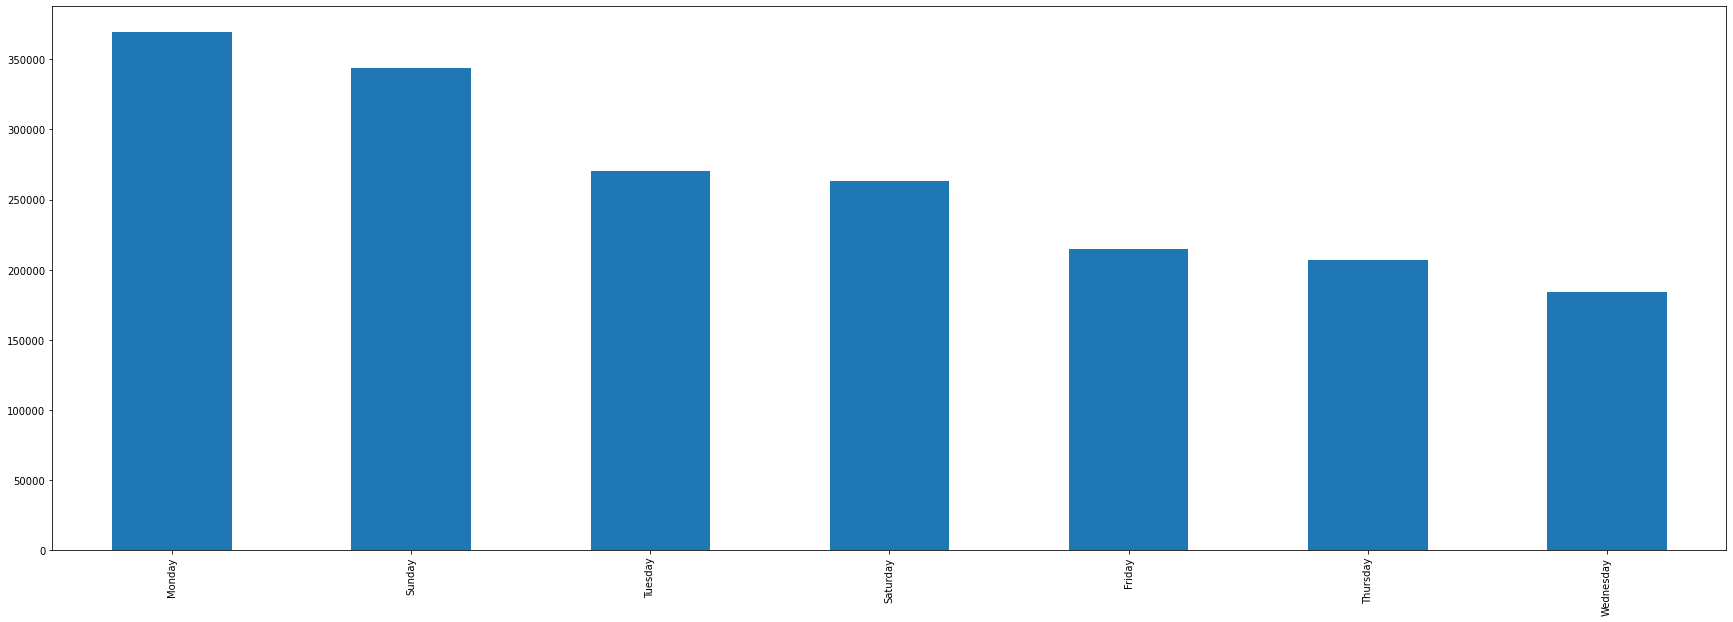

In [ ]:
# We are able to see the days with the highest transactions

plt.figure(figsize=(30,10))
Data['Day_of_Week'].value_counts().plot.bar()

# Monday and Sundays have the highest transactions

<AxesSubplot:>

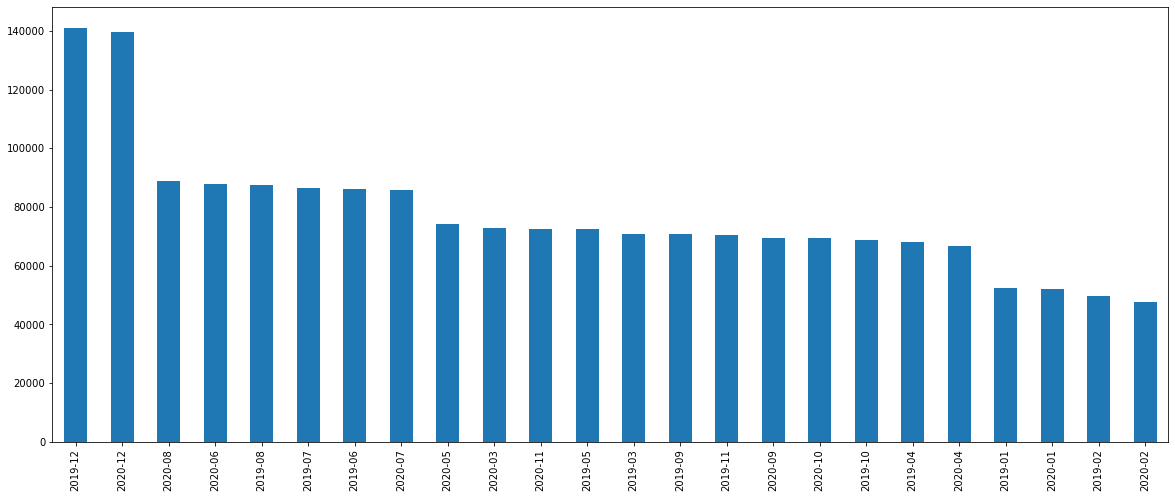

In [ ]:
plt.figure(figsize=(20,8))
Data['Year_Month'].value_counts().plot.bar()

# We can see that December (of 2019 & 2020) has the highest transactions 
#There also seems to be some sort of seasonality noted.

# Merchant Statistics

In [ ]:
Data['Merchant'].unique()

array(['fraud_Rippin, Kub and Mann', 'fraud_Heller, Gutmann and Zieme',
       'fraud_Lind-Buckridge', 'fraud_Kutch, Hermiston and Farrell',
       'fraud_Keeling-Crist', 'fraud_Stroman, Hudson and Erdman',
       'fraud_Rowe-Vandervort', 'fraud_Corwin-Collins',
       'fraud_Herzog Ltd', 'fraud_Schoen, Kuphal and Nitzsche',
       'fraud_Rutherford-Mertz', 'fraud_Kerluke-Abshire',
       'fraud_Lockman Ltd', 'fraud_Kiehn Inc', 'fraud_Beier-Hyatt',
       'fraud_Schmidt and Sons', 'fraud_Lebsack and Sons',
       'fraud_Mayert Group', 'fraud_Konopelski, Schneider and Hartmann',
       'fraud_Schultz, Simonis and Little', 'fraud_Bauch-Raynor',
       'fraud_Harris Inc', 'fraud_Kling-Grant', 'fraud_Pacocha-Bauch',
       'fraud_Lesch Ltd', 'fraud_Kunde-Sanford', "fraud_Deckow-O'Conner",
       'fraud_Bruen-Yost', 'fraud_Kunze Inc',
       'fraud_Nitzsche, Kessler and Wolff',
       'fraud_Kihn, Abernathy and Douglas', 'fraud_Torphy-Goyette',
       'fraud_Balistreri-Nader', 'fraud_Bahrin

In [ ]:
Data['Merchant'].nunique()

693

# Plotting Category

In [ ]:
Data['Category'].unique()

array(['misc_net', 'grocery_pos', 'entertainment', 'gas_transport',
       'misc_pos', 'grocery_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

<AxesSubplot:>

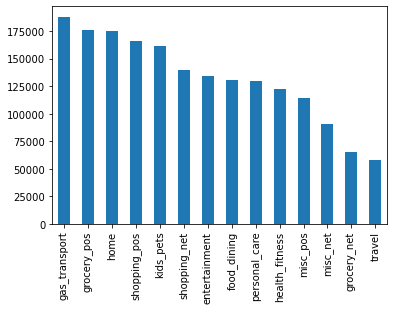

In [ ]:
#Bar Graph for Category
Data['Category'].value_counts().plot(kind='bar')

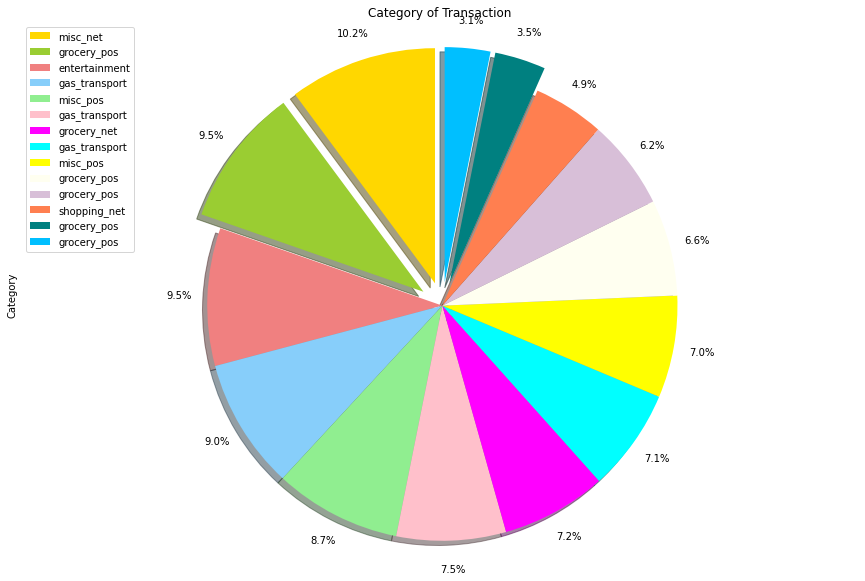

In [ ]:
#Statistics for Category
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'magenta',
               'aqua', 'yellow', 'ivory', 'thistle', 'coral', 'teal', 'deepskyblue']
explode_list = [0.1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0.1]
Data['Category'].value_counts().plot(kind = 'pie',
                          figsize=(15,10),
                          autopct='%1.1f%%', 
                          startangle = 90,
                          shadow=True, 
                          labels=None,
                          pctdistance=1.12,  
                          colors=colors_list,
                          explode=explode_list 
                           )

plt.title('Category of Transaction')
plt.axis('equal')

plt.legend (labels = Data.Category, loc='upper left')
plt.show()

In [ ]:
#we also want to group the catogories of transactions to get the number of transactions based on categories and 
#their percentAge of the whole transactions

Data_Category = Data[['Category','Trans_Num']].groupby(['Category']).count().reset_index()
Data_Category.columns = ['Category','Category_Count']

Data_Category['Percent'] = (Data_Category['Category_Count']/Data_Category['Category_Count'].sum())*100

Data_Category.sort_values(by = ['Percent'], ascending=False).reset_index()
Data_Category

,Category,Category_Count,Percent
0,entertainment,134118,7.240252
1,food_dining,130729,7.057300
2,gas_transport,188029,10.150594
3,grocery_net,64878,3.502387
4,grocery_pos,176191,9.511529
5,health_fitness,122553,6.615925
6,home,175460,9.472067
7,kids_pets,161727,8.730702
8,misc_net,90654,4.893883
9,misc_pos,114229,6.166561


In [ ]:
Data_Fraud_Category = Data[['Category','Is_Fraud','Trans_Num']].groupby(['Category','Is_Fraud']).count().reset_index()
Data_Fraud_Category.columns = ['Category','Is_Fraud','Count_Grp_Fraud']

Data_Fraud_Category = Data_Fraud_Category.merge(Data_Category[['Category','Category_Count','Percent']],how='inner',\
                                  left_on='Category',right_on='Category')


Data_Fraud_Category['Percent_Grp'] = (Data_Fraud_Category['Count_Grp_Fraud']/Data_Fraud_Category['Category_Count'])*100

Data_Fraud_Category.sort_values(by = ['Category'], ascending=False)

,Category,Is_Fraud,Count_Grp_Fraud,Category_Count,Percent,Percent_Grp
27,travel,1,156,57956,3.128708,0.269170
26,travel,0,57800,57956,3.128708,99.730830
25,shopping_pos,1,1056,166463,8.986371,0.634375
24,shopping_pos,0,165407,166463,8.986371,99.365625
23,shopping_net,1,2219,139322,7.521186,1.592713
22,shopping_net,0,137103,139322,7.521186,98.407287
21,personal_care,1,290,130085,7.022534,0.222931
20,personal_care,0,129795,130085,7.022534,99.777069
19,misc_pos,1,322,114229,6.166561,0.281890
18,misc_pos,0,113907,114229,6.166561,99.718110


In [ ]:
#from above table, we can see that grocery and shopping have the highest number of fraud transactions (where Is_Fraud = 1)

# Plotting Amount

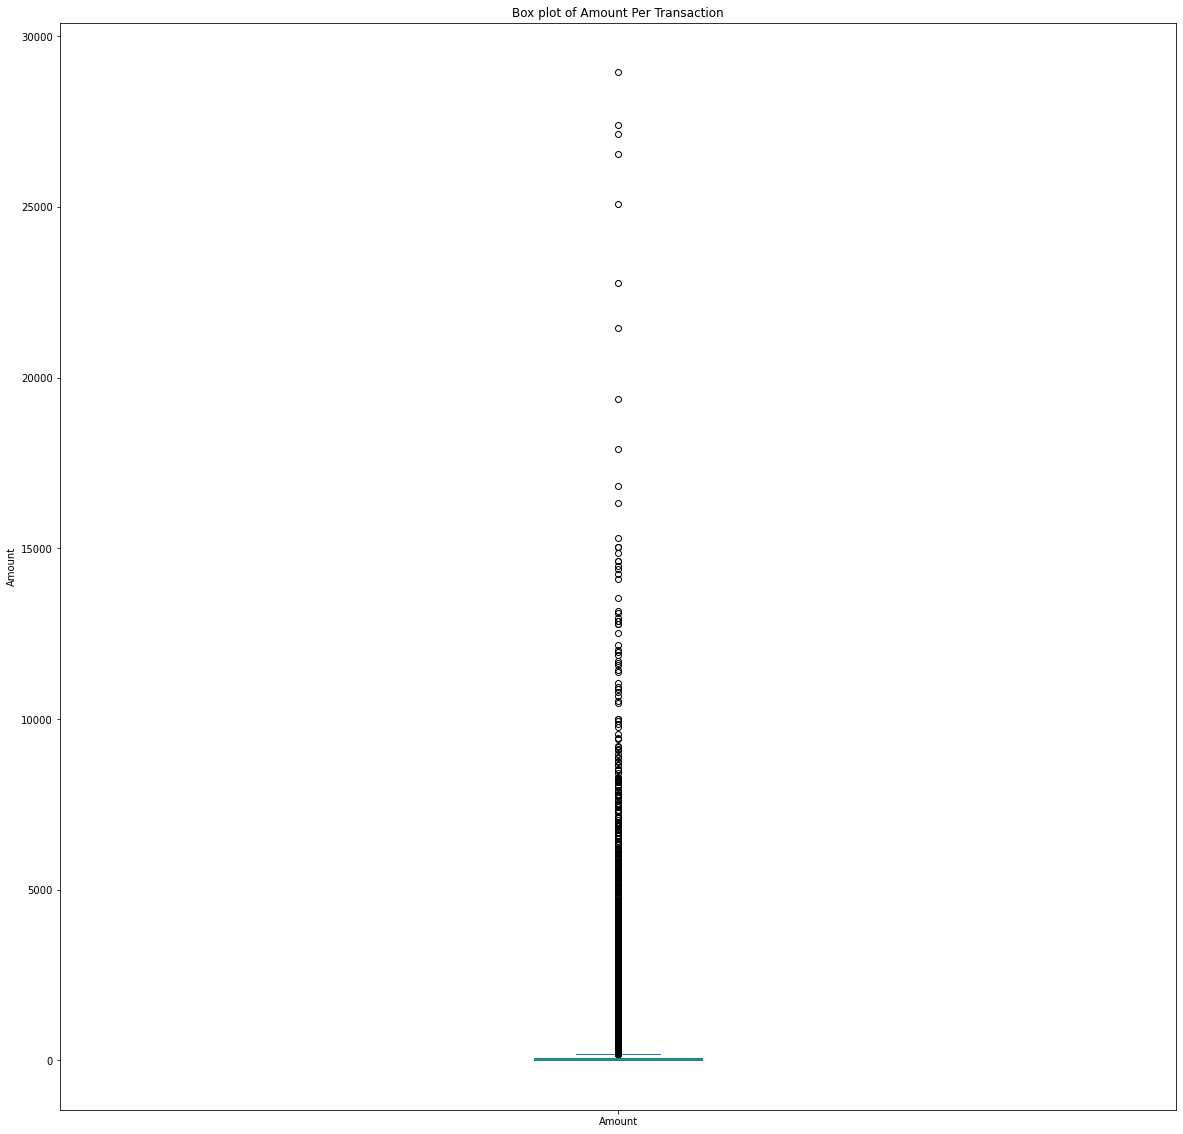

In [ ]:
#Box Plot for Amount
Data['Amount'].plot(kind='box',
                    figsize=(20,20))

plt.title('Box plot of Amount Per Transaction')
plt.ylabel('Amount')

plt.show()

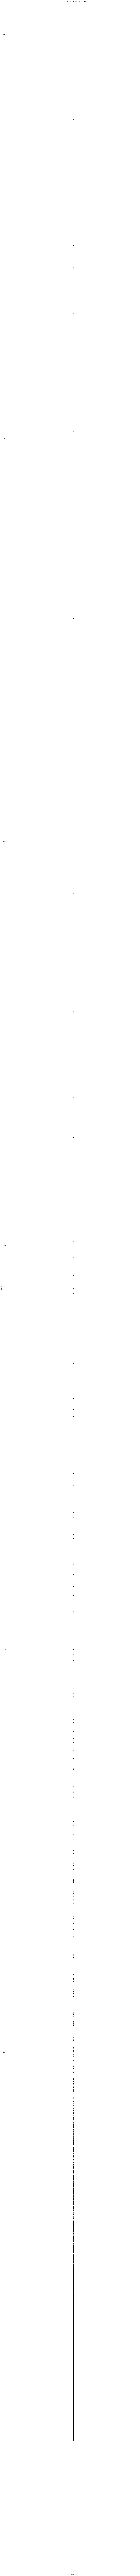

In [ ]:
# For better visibility of the above box plot
Data['Amount'].plot(kind='box',
                    figsize=(20,400))

plt.title('Box plot of Amount Per Transaction')
plt.ylabel('Amount')
plt.show()

In [ ]:
#Distribution of transaction amount by categories (grouped as fraud amount and nonfraud amount)
pd.concat(
[Data['Amount'].describe(percentiles = [0.5,0.95,0.999]).reset_index()
.rename(columns={'index': 'Row Type', 'Amount':'Overall Amount Distribution'}),   
#this line of code gives us the decribe details of amount column with specified percentiles and renames the columns 
Data.loc[Data['Is_Fraud']==0,['Amount']].describe(percentiles = [0.5,0.95,0.999]) 
.reset_index(drop = 1).rename(columns={'Amount':'Non-Fraud Amount Distribution'}), 
#this line of code does the same thing for Is_Fraud column where Is_Fraud = 0 as nonfraud distribution
Data.loc[Data['Is_Fraud']==1,['Amount']].describe(percentiles = [0.5,0.95,0.999])
.reset_index(drop = 1).rename(columns={'Amount':'Fraud Amount Distribution'})],
axis=1  
#this line of code does the same thing for Is_Fraud column where Is_Fraud = 1 as fraud distribution
) #the pd.concat function joins all of them together to make a table as seen below 

,Row Type,Overall Amount Distribution,Non-Fraud Amount Distribution,Fraud Amount Distribution
0,count,1.852394e+06,1.842743e+06,9651.000000
1,mean,7.006357e+01,6.765128e+01,530.661412
2,std,1.592540e+02,1.535481e+02,391.028873
3,min,1.000000e+00,1.000000e+00,1.060000
4,50%,4.745000e+01,4.724000e+01,390.000000
5,95%,1.953400e+02,1.895900e+02,1084.090000
6,99.9%,1.517241e+03,1.519623e+03,1293.127000
7,max,2.894890e+04,2.894890e+04,1376.040000


From data above, using count index, we can see that non fraud transactions (1.84*10^6) are way more than fraud transactions (9651)

# Plotting Gender

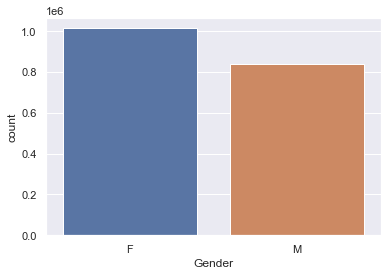

In [ ]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Gender", data=Data)

In [ ]:
#we want to show the distribution of credit card transactions among the genders 
#we take gender and Trans_Num columns and group the Trans_Num column by the gender to get the total count of 
#transactions made by each gender 

Data_Gender = Data[['Gender','Trans_Num']].groupby(['Gender']).count().reset_index()
Data_Gender.columns = ['Gender','Count_Trans_Gender']

#we find the percentage by adding a percent column wh
Data_Gender['Percent'] = (Data_Gender['Count_Trans_Gender']/Data_Gender['Count_Trans_Gender'].sum())*100

Data_Gender

,Gender,Count_Trans_Gender,Percent
0,F,1014749,54.780408
1,M,837645,45.219592


In [ ]:
#we need to group fraud or not by gender and get the percentage of fraud transactions across genders 
Data_Fraud_Gender = Data[['Gender','Is_Fraud','Trans_Num']].groupby(['Gender','Is_Fraud']).count().reset_index()
Data_Fraud_Gender.columns = ['Gender','Is_Fraud','Count_Transactions']

Data_Fraud_Gender = Data_Fraud_Gender.merge(Data_Gender[['Gender','Count_Trans_Gender']],how='inner',\
                                  left_on='Gender',right_on='Gender')


Data_Fraud_Gender['Percent_by_Group'] = (Data_Fraud_Gender['Count_Transactions']/Data_Fraud_Gender['Count_Trans_Gender'])*100


Data_Fraud_Gender

,Gender,Is_Fraud,Count_Transactions,Count_Trans_Gender,Percent_by_Group
0,F,0,1009850,1014749,99.517221
1,F,1,4899,1014749,0.482779
2,M,0,832893,837645,99.432695
3,M,1,4752,837645,0.567305


# Plotting City

In [ ]:
Data['City'].nunique()

906

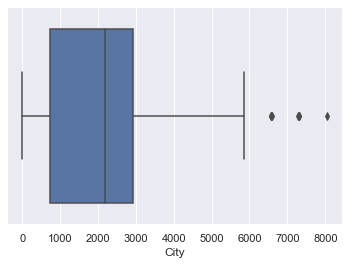

In [ ]:
# Box plot for City
ax = sns.boxplot(x=Data['City'].value_counts())

<AxesSubplot:xlabel='City', ylabel='Population'>

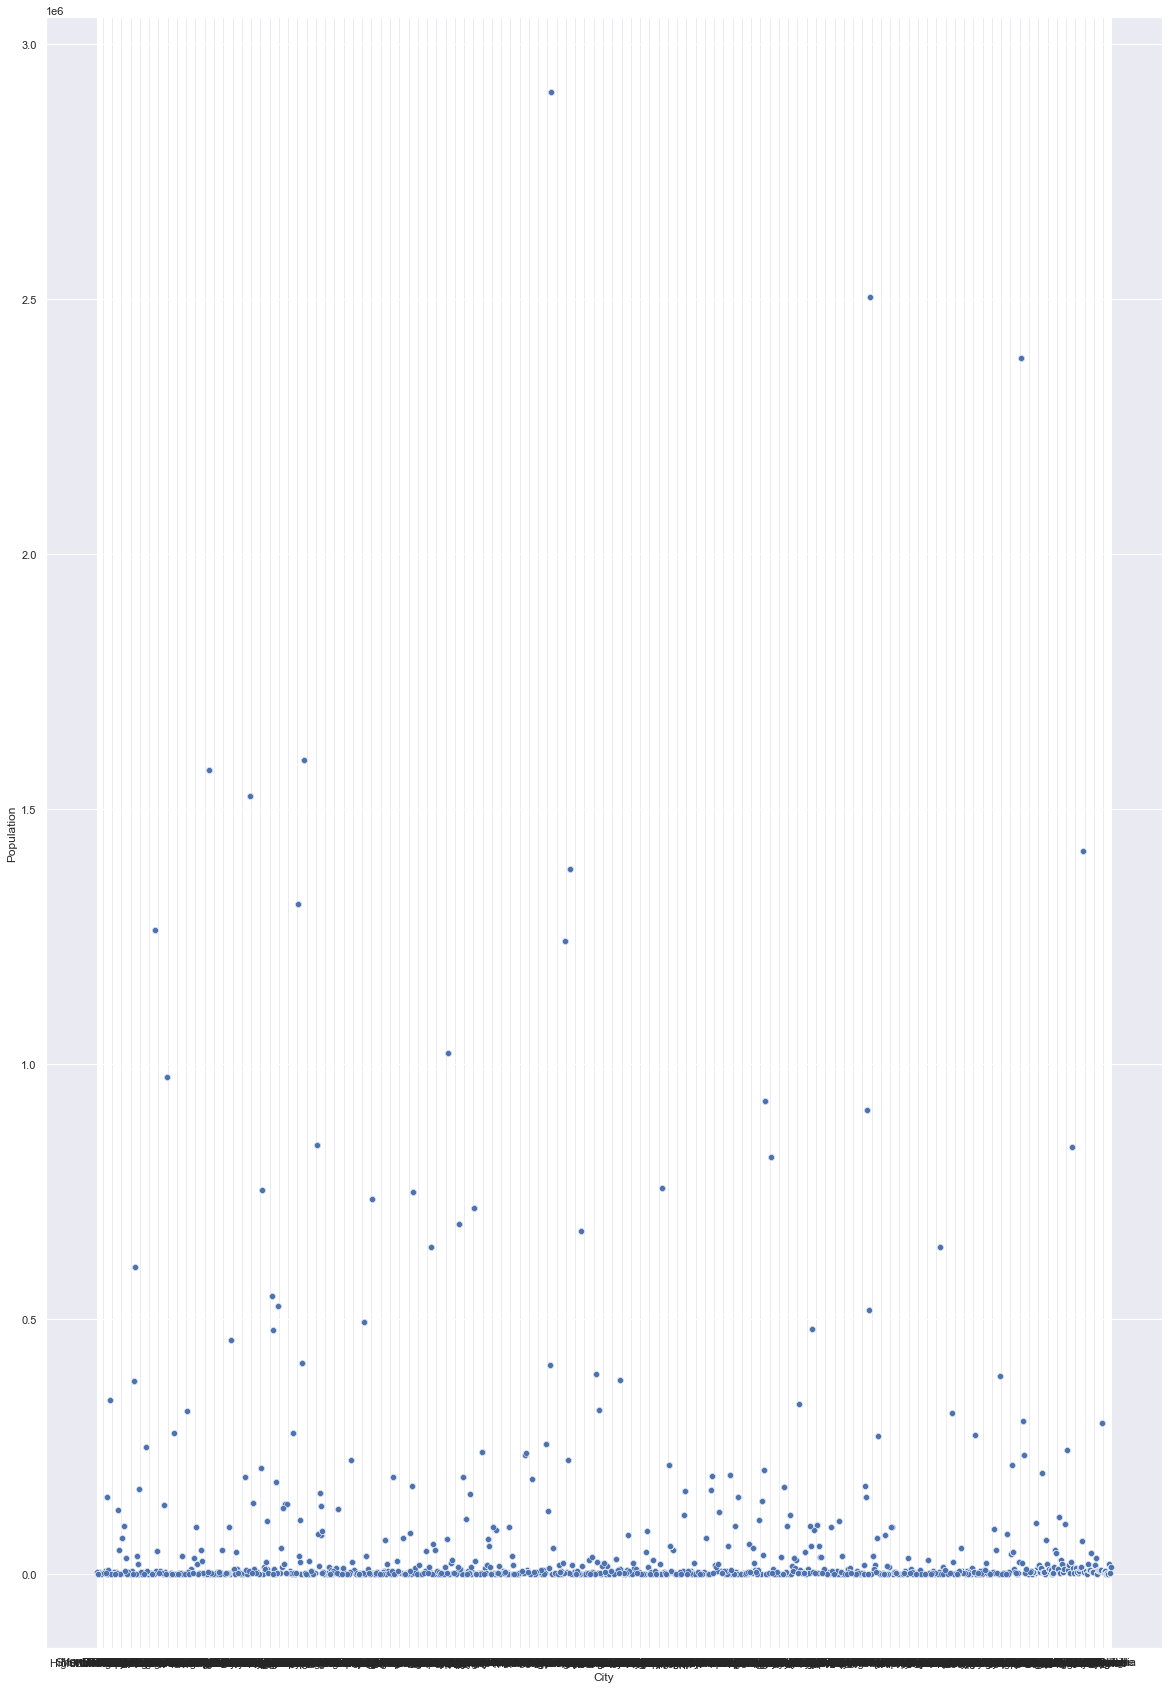

In [ ]:
#Statistics for City (adjusted for visibility)
plt.figure(figsize=(20,30))
sns.scatterplot(data=Data, x="City", y="Population")

# Plotting State

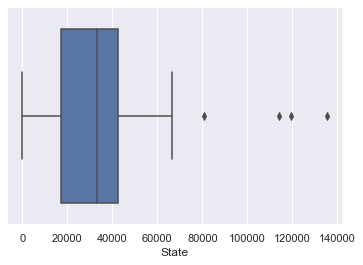

In [ ]:
#Box plot for State
ax = sns.boxplot(x=Data['State'].value_counts())

Text(0.5, 0, 'Name of State')

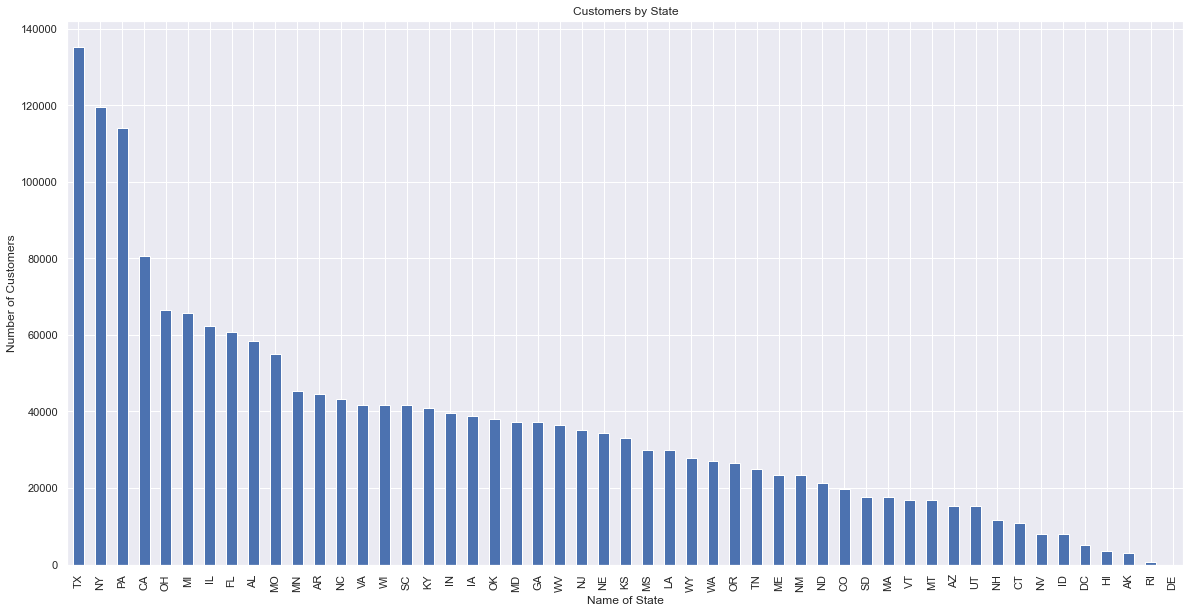

In [ ]:
Data.State.value_counts().plot(kind='bar', figsize=(20,10))
plt.title('Customers by State')
plt.ylabel('Number of Customers')
plt.xlabel('Name of State')

# Plotting Population

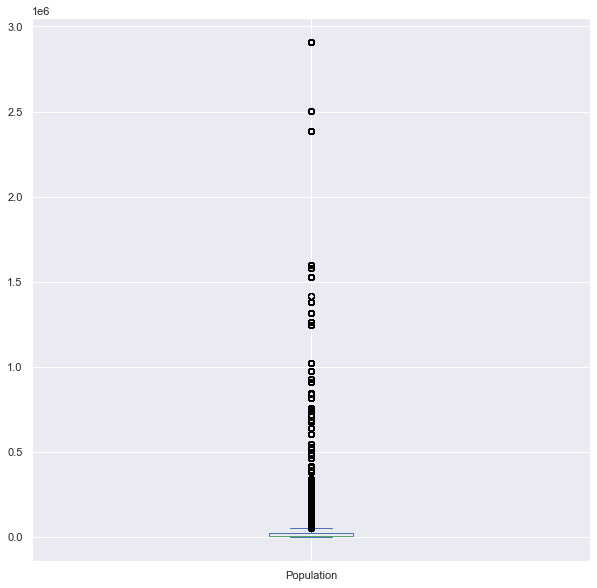

In [ ]:
#Statistics for Population
Data['Population'].plot(kind='box', figsize=(10,10))
plt.show()

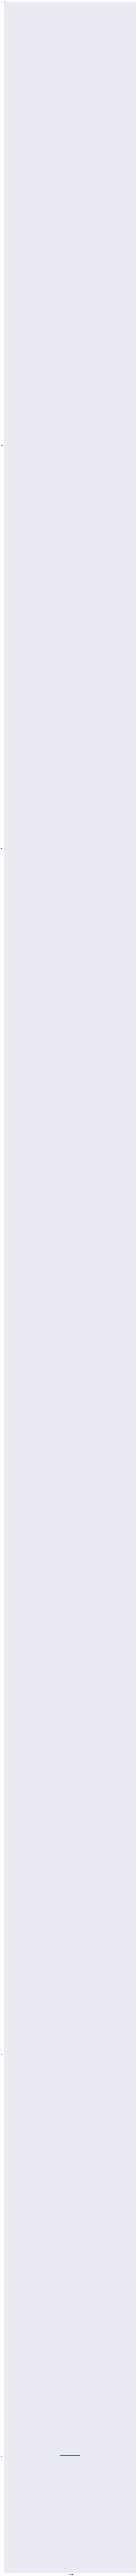

In [ ]:
#Use this to enlarge graph to see details
Data['Population'].plot(kind='box', figsize=(20,400)) 
plt.show()

# Plotting Birthdate (Age)

In [ ]:
Data.Age.describe()

count    1.852394e+06
mean     4.626617e+01
std      1.741239e+01
min      1.400000e+01
25%      3.300000e+01
50%      4.400000e+01
75%      5.700000e+01
max      9.600000e+01
Name: Age, dtype: float64

Average Age of card holders is 46 years

50 percentile of people are between 33-57 years old

The youngest person is 14 years old while the oldest is 96 years old

<AxesSubplot:xlabel='Age', ylabel='Amount'>

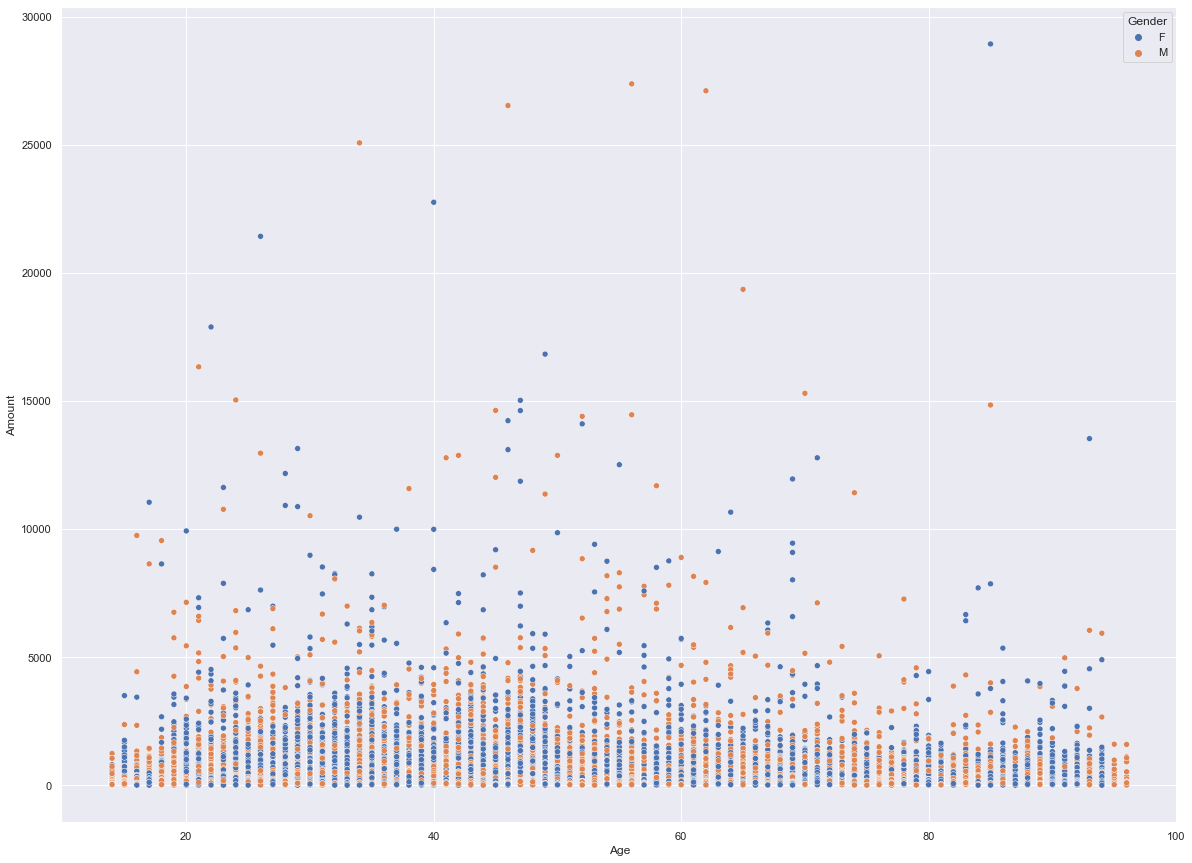

In [ ]:
plt.figure(figsize=(20,15))
sns.scatterplot(data=Data, x="Age", y="Amount", hue="Gender")

# Target Variable (Is_Fraud)

<AxesSubplot:xlabel='Date_Time', ylabel='Amount'>

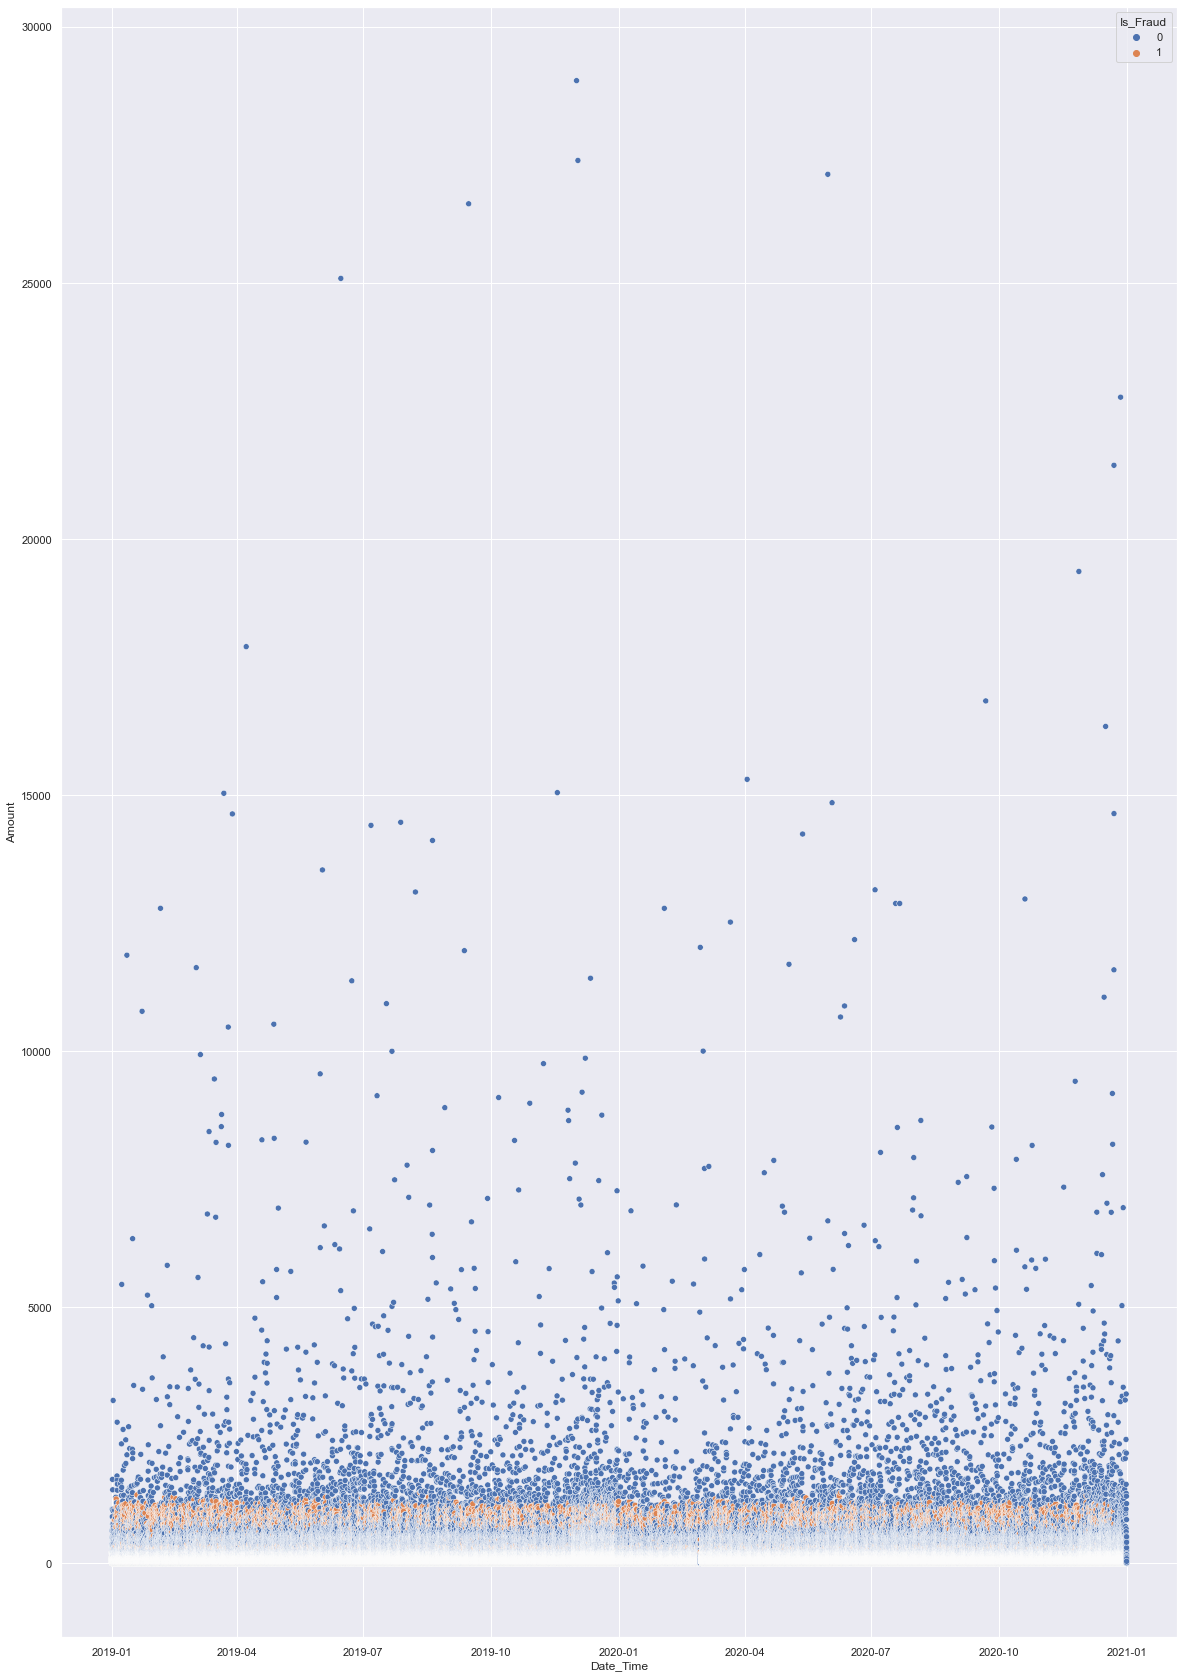

In [ ]:
plt.figure(figsize=(20,30))
sns.scatterplot(data=Data, x="Date_Time", y="Amount", hue="Is_Fraud")

Text(0.5, 0, 'Count')

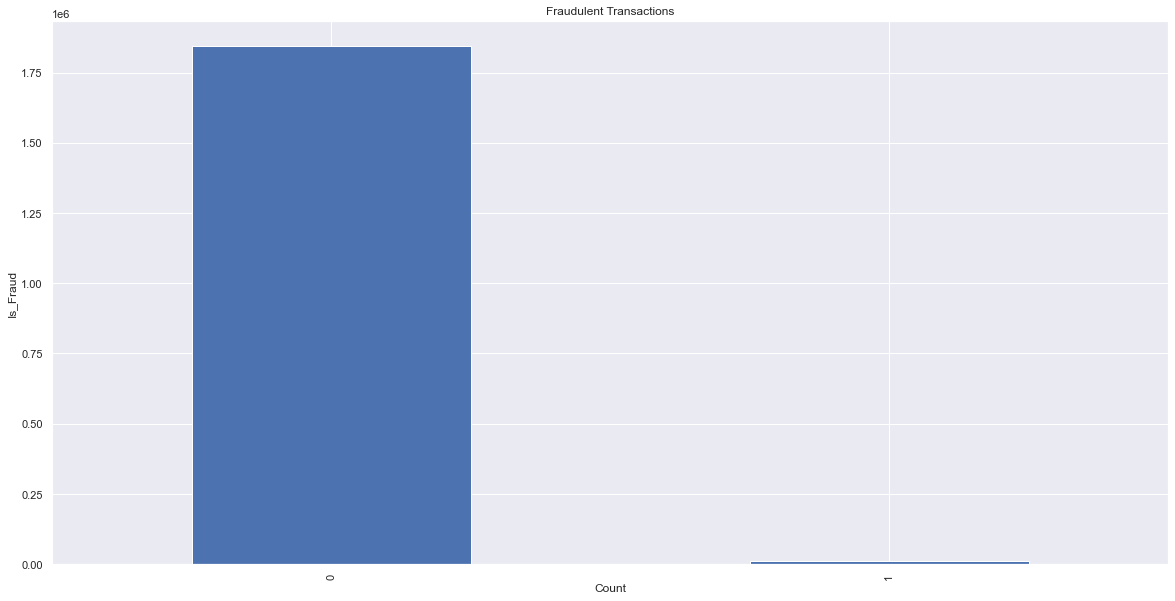

In [ ]:
Data.Is_Fraud.value_counts().plot(kind='bar', figsize=(20,10))
plt.title('Fraudulent Transactions')
plt.ylabel('Is_Fraud')
plt.xlabel('Count')

# MACHINE LEARNING MODEL

In [ ]:
!pip install feature_engine imbalanced_learn

     |████████████████████████████████| 180 kB 2.8 MB/s eta 0:00:01


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from feature_engine.encoding import WoEEncoder, RareLabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import os

In [ ]:
Data.head()

,Date_Time,Card_Number,Merchant,Category,Amount,Gender,City,State,Population,Job,...,Trans_Num,Is_Fraud,Year,Quarter,Month,Day_of_Month,Day_of_Week,Hour_of_Day,Year_Month,Age
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,3495,"Psychologist, counselling",...,0b242abb623afc578575680df30655b9,0,2019,1,1,1,Tuesday,0,2019-01,31.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,149,Special educational needs teacher,...,1f76529f8574734946361c461b024d99,0,2019,1,1,1,Tuesday,0,2019-01,41.0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,4154,Nature conservation officer,...,a1a22d70485983eac12b5b88dad1cf95,0,2019,1,1,1,Tuesday,0,2019-01,57.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,1939,Patent attorney,...,6b849c168bdad6f867558c3793159a81,0,2019,1,1,1,Tuesday,0,2019-01,52.0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,99,Dance movement psychotherapist,...,a41d7549acf90789359a9aa5346dcb46,0,2019,1,1,1,Tuesday,0,2019-01,33.0


In [ ]:
#we have identified categories, gender, and time(days of the week) as crucial features for our prediction, 
#hence we want to encode them to enable us feed them into a model 
Category_encode = pd.get_dummies(Data.Category, prefix='Category', drop_first=True)
gender_encode = pd.get_dummies(Data.Gender, prefix='Gender', drop_first=True)
Day_of_Week_encode = pd.get_dummies(Data.Day_of_Week, prefix='week',drop_first=True)

In [ ]:
Test_data = pd.concat([Data, Category_encode,gender_encode,Day_of_Week_encode], axis=1)
#drop_columns = ['street', 'first', 'last', 'unix_time', 'zip', 'lat', 'long', 'merch_lat', 'merch_long']
#Test_data.drop(['street', 'first', 'last', 'unix_time', 'zip', 'lat','long', 'merch_lat', 'merch_long'], axis=1)#'merch_lat', 'merch_long')#(drop_columns, 1)
Test_data.head()
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 41 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   Date_Time                datetime64[ns]
 1   Card_Number              int64         
 2   Merchant                 object        
 3   Category                 object        
 4   Amount                   float64       
 5   Gender                   object        
 6   City                     object        
 7   State                    object        
 8   Population               int64         
 9   Job                      object        
 10  Birthdate                datetime64[ns]
 11  Trans_Num                object        
 12  Is_Fraud                 int64         
 13  Year                     int64         
 14  Quarter                  int64         
 15  Month                    int64         
 16  Day_of_Month             int64         
 17  Day_of_Week              obj

In [ ]:
#we convert transaction time to datetime format, then we set transaction time as index and sort by index

Test_data.index = pd.to_datetime(Test_data['Date_Time'])
Test_data = Test_data.rename_axis(index={'Date_Time': 'time_index'})
Test_data = Test_data.sort_index()
Test_data.head()

,Date_Time,Card_Number,Merchant,Category,Amount,Gender,City,State,Population,Job,...,Category_shopping_net,Category_shopping_pos,Category_travel,Gender_M,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday
time_index,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:18,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,3495,"Psychologist, counselling",...,0,0,0,0,0,0,0,0,1,0
2019-01-01 00:00:44,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,149,Special educational needs teacher,...,0,0,0,0,0,0,0,0,1,0
2019-01-01 00:00:51,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,4154,Nature conservation officer,...,0,0,0,1,0,0,0,0,1,0
2019-01-01 00:01:16,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,1939,Patent attorney,...,0,0,0,1,0,0,0,0,1,0
2019-01-01 00:03:06,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,99,Dance movement psychotherapist,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
Test_data['val_for_agg'] = 1
Test_data_cust_hist_trans_60 = Test_data.groupby(['Card_Number'])['val_for_agg'].rolling('60D').count().shift().reset_index().fillna(0)

Test_data_cust_hist_trans_60.columns = ['Card_Number','trans_date','hist_trans_60d']
Test_data_cust_hist_trans_60.head() #here we can see the card numbers and the times of transaction as well as historical transactions for 60days 

,Card_Number,trans_date,hist_trans_60d
0,60416207185,2019-01-01 12:47:15,0.0
1,60416207185,2019-01-02 08:44:57,1.0
2,60416207185,2019-01-02 08:47:36,2.0
3,60416207185,2019-01-02 12:38:14,3.0
4,60416207185,2019-01-02 13:10:46,4.0


In [ ]:
Test_data_cust_hist_trans_60['trans_date'] = Test_data_cust_hist_trans_60['trans_date'].dt.date

In [ ]:
Test_data_cust_hist_trans_60 = Test_data_cust_hist_trans_60.groupby(['Card_Number','trans_date'])['hist_trans_60d'].min().reset_index()
Test_data_cust_hist_trans_60.head()

,Card_Number,trans_date,hist_trans_60d
0,60416207185,2019-01-01,0.0
1,60416207185,2019-01-02,1.0
2,60416207185,2019-01-03,5.0
3,60416207185,2019-01-04,7.0
4,60416207185,2019-01-05,9.0


In [ ]:
Test_data['trans_date'] = Test_data['Date_Time'].dt.date
Train_data = Test_data.merge(Test_data_cust_hist_trans_60,left_on = ['Card_Number','trans_date'], right_on = ['Card_Number','trans_date'],how = 'left')

In [ ]:
Train_data.head()

,Date_Time,Card_Number,Merchant,Category,Amount,Gender,City,State,Population,Job,...,Gender_M,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday,val_for_agg,trans_date,hist_trans_60d
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,3495,"Psychologist, counselling",...,0,0,0,0,0,1,0,1,2019-01-01,1.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,149,Special educational needs teacher,...,0,0,0,0,0,1,0,1,2019-01-01,1.0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,4154,Nature conservation officer,...,1,0,0,0,0,1,0,1,2019-01-01,8.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,1939,Patent attorney,...,1,0,0,0,0,1,0,1,2019-01-01,1.0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,99,Dance movement psychotherapist,...,1,0,0,0,0,1,0,1,2019-01-01,1.0


# Plotting features against Is_Fraud (Feature Importance)

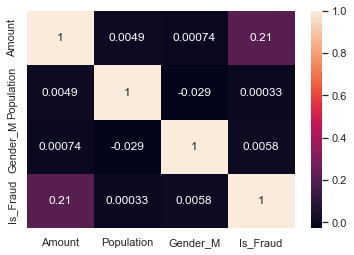

In [ ]:
Data1 = Train_data[['Amount', 'Population','Gender_M', 'Is_Fraud']]
Data1.corr()
ax = sns.heatmap(Data1.corr(), annot=True)

# Logistic Regression

In [ ]:
#Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
#As this dataset is highly imbalanced we have to balance this by applying over sampling technique 
non_fraud_count = Train_data[Train_data['Is_Fraud'] == 0]['Amount'].count()
Train_data_fraud = Train_data[Train_data['Is_Fraud'] == 1]
Train_data_nonfraud = Train_data[Train_data['Is_Fraud'] == 0]
Train_data_fraud_oversample = Train_data_fraud.sample(non_fraud_count, replace=True)
Train_data_oversampled = pd.concat([Train_data_nonfraud, Train_data_fraud_oversample], axis=0)
Train_data_oversampled.head()

,Date_Time,Card_Number,Merchant,Category,Amount,Gender,City,State,Population,Job,...,Gender_M,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday,val_for_agg,trans_date,hist_trans_60d
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,3495,"Psychologist, counselling",...,0,0,0,0,0,1,0,1,2019-01-01,1.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,149,Special educational needs teacher,...,0,0,0,0,0,1,0,1,2019-01-01,1.0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,4154,Nature conservation officer,...,1,0,0,0,0,1,0,1,2019-01-01,8.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,1939,Patent attorney,...,1,0,0,0,0,1,0,1,2019-01-01,1.0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,99,Dance movement psychotherapist,...,1,0,0,0,0,1,0,1,2019-01-01,1.0


In [ ]:
X_cols = ['Amount','Population', 'Hour_of_Day',
       'Age', 'Category_food_dining', 'Category_gas_transport',
       'Category_grocery_net', 'Category_grocery_pos',
       'Category_health_fitness', 'Category_home', 'Category_kids_pets',
       'Category_misc_net', 'Category_misc_pos', 'Category_personal_care',
       'Category_shopping_net', 'Category_shopping_pos', 'Category_travel',
       'Gender_M','week_Monday','week_Tuesday', 'week_Wednesday','week_Thursday',
        'week_Saturday', 'week_Sunday','hist_trans_60d'] #,X_train, X_test, y_train, y_test = train_test_split(Train_data_oversampled[X_cols],Train_data_oversampled[Y_cols] , train_size=0.7, test_size=0.3, random_state=42)
Y_cols = ['Is_Fraud']

In [ ]:
#splitting the data into training and test 
X_train, X_test, y_train, y_test = train_test_split(Train_data_oversampled[X_cols],Train_data_oversampled[Y_cols] , train_size=0.7, test_size=0.3, random_state=42)
X_train.shape

(2579840, 25)

In [ ]:
X_test.shape

(1105646, 25)

In [ ]:
#Building Logistic Regression  Model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train , y_train.values.ravel())

LogisticRegression(random_state=42)

In [ ]:
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

In [ ]:
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[1211745   78166]
 [ 326167  963762]]
              precision    recall  f1-score   support

           0       0.79      0.94      0.86   1289911
           1       0.92      0.75      0.83   1289929

    accuracy                           0.84   2579840
   macro avg       0.86      0.84      0.84   2579840
weighted avg       0.86      0.84      0.84   2579840

[[519758  33074]
 [139765 413049]]
              precision    recall  f1-score   support

           0       0.79      0.94      0.86    552832
           1       0.93      0.75      0.83    552814

    accuracy                           0.84   1105646
   macro avg       0.86      0.84      0.84   1105646
weighted avg       0.86      0.84      0.84   1105646



Logistic Regression model results:

Precision is sort of like accuracy but it looks only at the data you predicted positive (in this example you’re only looking at data where you predict fraud). 
Recall is also sort of like accuracy but it looks only at the data that is “relevant” in some way.